## Environment

In [10]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score

from matplotlib import pyplot as plt

!pip install MiniSom > /dev/null
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler


## Load data

In [13]:
labels = pd.read_csv('https://raw.githubusercontent.com/sinc-lab/biomonitoring_glifosato_with_ML/master/Labels_glyphosate.csv')
y = labels["Labels_glyphosate"]
target_names=np.array(['Q1','Q2','Q3','Q4'])
dataset = pd.read_excel('https://raw.githubusercontent.com/sinc-lab/biomonitoring_glifosato_with_ML/master/Biomonitoring_data_SOM.xlsx',index_col=0)
dataset= dataset.replace(np.nan, 0) 

In [14]:
y=y.replace('Q1',1)
y=y.replace('Q2',2)
y=y.replace('Q3',3)
y=y.replace('Q4',4)

In [15]:
DATA_orig= dataset.drop(['Localities','Educational Level','Residence time (years)','Height (m)', 'Body weight (kg)','Concentration_creatinine(mg/dL)','Urinary_glyphosate_levels (µg/L)','Quartiles (GLY_creat)' ], axis=1)

## Filter data ==> Overweight_obese_women (Yes_No) = 1

In [16]:
DATA = DATA_orig.loc[DATA_orig['Overweight_obese_women (Yes_No)'] == 1]
DATA = DATA.drop(['Overweight_obese_women (Yes_No)'], axis=1)
from itertools import compress
list_a = y
fil = DATA_orig['Overweight_obese_women (Yes_No)'] == 1
y =list(compress(list_a, fil))

In [18]:
X=DATA.to_numpy()

## Data normalization and SOM training

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [20]:
W = 1
H = 3
niter = 20000

som = MiniSom(W, H, X.shape[1], sigma=.5, learning_rate=.5,neighborhood_function='gaussian', random_seed=10)
som.train_batch(X, niter, verbose=True)

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 1.7261015057676947


### SOM plot - number of data points in each neuron

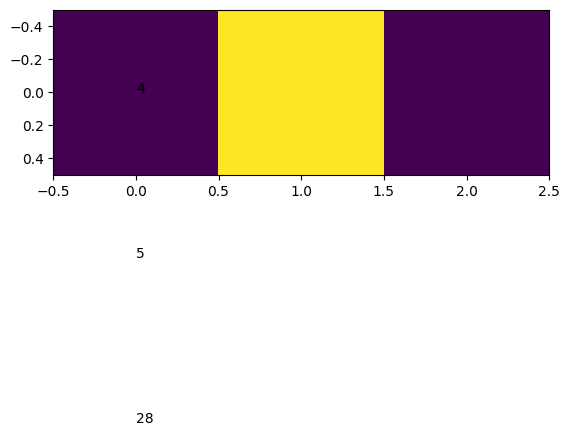

In [21]:
hitmap = som.activation_response(X)
dist_map = som.distance_map()
plt.imshow(dist_map)
for i in range(W):
    for j in range(H):
        plt.text(i, j, int(hitmap[i, j]));

### SOM plot - TYPE of data points in each neuron

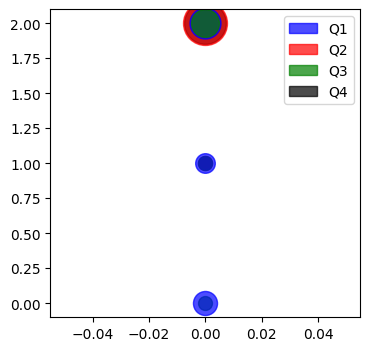

In [22]:
labels_map = som.labels_map(X, y)
colors = ['blue', 'red', 'green', 'black']
fig = plt.figure(figsize=(4, 4))
for i, j in labels_map:
    for label in labels_map[(i, j)]:
      plt.scatter(i, j, alpha=.7, s=labels_map[(i, j)][label]*100, c=colors[label-1])
import matplotlib.patches as mpatches
legends = [mpatches.Patch(color=c, label=l, alpha=.7) for c, l in zip(colors, target_names)]
plt.legend(handles=legends);

## Which data point was grouped in which neuron

In [23]:
winner_coordinates = np.array([som.winner(x) for x in X]).T
som_shape = (W,H)
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
for c in np.unique(cluster_index):
     #display(dataset[:].iloc[np.where(cluster_index==c)].drop(['Nombre_apellido', 'Localidad', 'Tareas_cuales','Tareas_tiempo','Plaguicidas_tiempo','Plaguicidas_cuales','Lava_ropa_trabajo','Lava_ropa_frec','Campo_prox_cuanto','Campo_plaguicidas','Campo_apl_forma','Fumiga_frec','Actividad_fisica','Verdura','Fruta','Vitaminas_cuales','Agua_potable','Vaca','Pollo','Cerdo','Hamburguesas','Embutidos','Lacteos_frec','Alcohol_frec','Alcohol_cantidad','Tabaco_actual','Tabaco_diario','Consulta_medico','Controles_anuales_cuales','Enfermedades_diag','Tipo_cancer','HPV','Cancer_familia_tipo','Cancer_familia_interes','Hijos_cuando','Embarazo_inc','Lactancia_tiempo','Anticonceptivos_actual','Anticonceptivos_tiempo','Menopausia_edad','Trabaja_ocupacion','Trabaja_ingresos','Entrego_muestra', 'Glifo_CREAT ug/L CAT','Estacion_año'], axis=1))
     X_ind = np.where(cluster_index==c)
     rows = X[X_ind,:]
     std_rows = np.std(rows, axis=1)
     col=std_rows<0.30
     print('----------------------------------')
     print(['NEURON '+ str(c+1)])
     display(DATA[DATA.columns[np.where(col)[1]]].iloc[np.where(cluster_index==c)])
     print('----------------------------------')


----------------------------------
['NEURONA 1']


,Age (years),Live in the city of Santa Fe(Yes_No),Complete primary education,Body_mass_index(kg/m2),Live_near_agricultural_fields(Yes_No),Campo_prox,Physical activity,Consumption of vegetables,Consumption of red meat (Yes_No),Consumption of white meat (Yes/No),ug Glyphosate/ g creatinine
Code_samples,,,,,,,,,,,
MC7,29,0,1,30.4,1,1,0,1,1,1,0.369449
MC12,38,0,1,30.0,1,1,0,1,1,1,0.137993
MC52,40,0,1,30.5,1,1,0,1,1,1,0.129091
MC59,25,0,1,29.7,1,1,0,1,1,1,0.068790


----------------------------------
----------------------------------
['NEURONA 2']


,Age (years),Live in the city of Santa Fe(Yes_No),Complete primary education,Body_mass_index(kg/m2),Live_near_agricultural_fields(Yes_No),Rural_labor_tasks,Family_members_working_with_pesticides_(Yes_No),Campo_prox,Pesticides application at home,Drinking water source,Childhood in rural areas,Tobacco consumption,ug Glyphosate/ g creatinine
Code_samples,,,,,,,,,,,,,
MC13,35,0,1,25.0,1,0,0,1,0,0,0,0,3.719553
MC21,27,0,1,28.0,1,0,0,1,0,0,0,0,0.157295
MC25,51,0,1,25.4,1,0,0,1,0,0,0,0,0.567453
MC29,27,0,1,33.3,1,0,0,1,0,0,0,0,0.130114
MC31,36,0,1,30.1,1,0,0,1,0,0,0,0,0.110558


----------------------------------
----------------------------------
['NEURONA 3']


,Age (years),Body_mass_index(kg/m2),Rural_labor_tasks,Use of agrochemicals,Family_members_working_with_pesticides_(Yes_No),Campo_prox,Consumption of vegetables,Drinking water source,Consumption of white meat (Yes/No),ug Glyphosate/ g creatinine
Code_samples,,,,,,,,,,
MC1,45,28.5,0,0,0,0,0,0,1,2.649565
MC9,47,31.1,0,0,0,0,1,0,1,1.026936
MC10,65,26.5,0,0,0,0,1,0,1,0.161752
MC11,26,31.1,0,0,0,0,0,0,1,0.231657
MC14,42,28.4,0,0,0,0,1,0,1,0.111174
MC16,48,41.0,0,0,0,0,1,0,1,0.139130
MC19,55,37.3,0,0,0,0,1,0,1,1.550229
MC20,32,35.9,0,0,0,0,1,0,1,1.220336
MC22,46,27.0,0,0,0,0,1,0,1,10.073304


----------------------------------
